In [6]:
import rasterio                  # I/O raster data (netcdf, height, geotiff, ...)
import os
import matplotlib.pyplot as plt  # plotting tools
%matplotlib inline
import pickle
import numpy as np

In [16]:
dataset_dir=r'D:\lakemapping\2_dataset\patchesReshape588'
output_dir=r'D:\lakemapping\2_dataset\output588'
NDWI_fn = 'ndwi'
image_type = '.png' 
patch_size = (512,512,4)
type_num=6

### 1

In [ ]:
dataType='val'
i=0

In [ ]:
numList=[]
path_to_write=os.path.join(dataset_dir,'{}/type{}'.format(dataType,i))
all_files = os.listdir(path_to_write)
all_files_NDWI = [fn for fn in all_files if fn.startswith(NDWI_fn) and fn.endswith(image_type)]#ndwi.png
for j, fn in enumerate(all_files_NDWI):
    NDWI_img = rasterio.open(os.path.join(path_to_write, fn))
    read_NDWI_img = NDWI_img.read()
    rowNum=read_NDWI_img.shape[1]/patch_size[0]
    colNum=read_NDWI_img.shape[2]/patch_size[1]
    numList.append(rowNum*colNum)
numList.sort()
x=range(0,len(numList))
plt.bar(x,numList)
plt.xlabel('area num')
plt.ylabel('patch num per area')
numList=np.array(numList)
plt.title(dataType+' type{} image number:{}\n total patch number:{}'.format(i,len(all_files_NDWI),int(numList.sum())),loc='left')
plt.ylim(0,80)
plt.xlim(0,45)
fig_name = dataType+'_type{}.png'.format(i)
plt.savefig(fig_name)
plt.close()
i=i+1

### 2

In [ ]:
dataType='val'
totalNumList=[]
for i in range(0,type_num):
    numList=[]
    path_to_write=os.path.join(dataset_dir,'{}/type{}'.format(dataType,i))
    all_files = os.listdir(path_to_write)
    all_files_NDWI = [fn for fn in all_files if fn.startswith(NDWI_fn) and fn.endswith(image_type)]#ndwi.png
    for j, fn in enumerate(all_files_NDWI):
        NDWI_img = rasterio.open(os.path.join(path_to_write, fn))
        read_NDWI_img = NDWI_img.read()
        rowNum=read_NDWI_img.shape[1]/patch_size[0]
        colNum=read_NDWI_img.shape[2]/patch_size[1]
        numList.append(rowNum*colNum)
    numList.sort()
    totalNumList=totalNumList+numList
    print('{},{}'.format(len(all_files_NDWI),int(np.array(numList).sum())))
x=range(0,len(totalNumList))
plt.bar(x,totalNumList)
plt.xlabel('area num')
plt.ylabel('patch num per area')
plt.title(dataType)
fig_name = dataType+'_area_patch_num_bar.png'.format(i)
plt.savefig(fig_name)
plt.close()

### 3

Text(0, 0.5, 'Number')

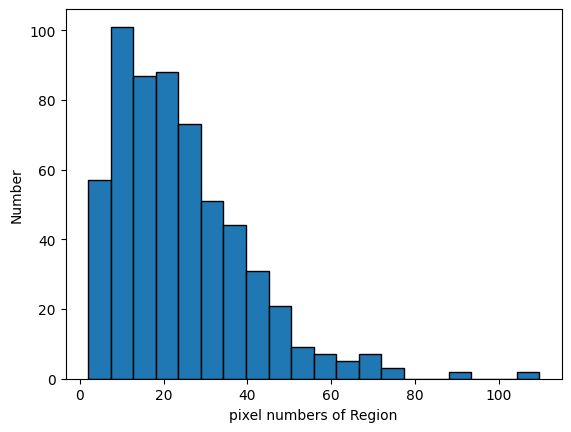

In [20]:
# numList=[]
# for i in range(0,type_num):
#     path_to_write=os.path.join(output_dir,'output{}'.format(i))
#     all_files = os.listdir(path_to_write)
#     all_files_NDWI = [fn for fn in all_files if fn.startswith(NDWI_fn) and fn.endswith(image_type)]#ndwi.png
#     for j, fn in enumerate(all_files_NDWI):
#         NDWI_img = rasterio.open(os.path.join(path_to_write, fn))
#         read_NDWI_img = NDWI_img.read()
#         rowNum=read_NDWI_img.shape[1]/patch_size[0]
#         colNum=read_NDWI_img.shape[2]/patch_size[1]
#         numList.append(rowNum*colNum)
plt.hist(numList,bins=20,histtype='bar',edgecolor="k")
# plt.xscale("log")
plt.xlabel("pixel numbers of Region")
plt.ylabel("Number")

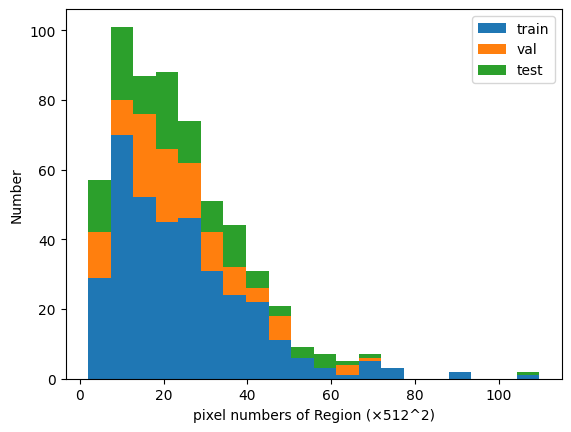

In [25]:
# def fun(dataType):
#     numList=[]
#     for i in range(0,type_num):
#         path_to_write=os.path.join(dataset_dir,'{}/type{}'.format(dataType,i))
#         all_files = os.listdir(path_to_write)
#         all_files_NDWI = [fn for fn in all_files if fn.startswith(NDWI_fn) and fn.endswith(image_type)]#ndwi.png
#         for j, fn in enumerate(all_files_NDWI):
#             NDWI_img = rasterio.open(os.path.join(path_to_write, fn))
#             read_NDWI_img = NDWI_img.read()
#             rowNum=read_NDWI_img.shape[1]/patch_size[0]
#             colNum=read_NDWI_img.shape[2]/patch_size[1]
#             numList.append(rowNum*colNum)
#     return numList
# trainNum=fun("train")
# valNum=fun("val")
# testNum=fun("test")
plt.hist([trainNum,valNum,testNum],bins=20,stacked=True)
# plt.xscale("log")
plt.xlabel("pixel numbers of Region (×512^2)")
plt.ylabel("Number")
plt.legend(['train','val','test'])

In [4]:
# 读取现有history文件
with open(r'D:\lakemapping\U_Net\notebooks\history\6type_588\step_per_epoch=532\new_random_strategy\1112\history_AdaDelta_dice_loss_512100_16_0123.txt','rb')as file_pi:
    h_adadelta=pickle.load(file_pi)
with open(r'D:\lakemapping\U_Net\notebooks\history\6type_588\step_per_epoch=532\new_random_strategy\no_change\history_AdaDelta_dice_loss_512100_16_0123.txt','rb')as file_pi:
    h_comparision=pickle.load(file_pi)
with open(r'D:\lakemapping\U_Net\notebooks\history\6type_588\step_per_epoch=532\new_random_strategy\history_adam_dice_loss_512100_16_0123.txt','rb')as file_pi:
    h_adam=pickle.load(file_pi)

Text(0, 0.5, 'Loss')

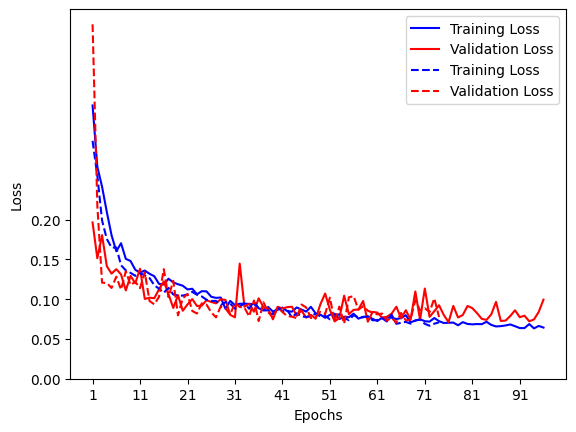

In [15]:
plt.figure()
train_loss =h_adadelta['loss']
val_loss =h_adadelta['val_loss']
train_loss_adam =h_adam['loss']
val_loss_adam =h_adam['val_loss']
x_ticks= np.arange(1, 101,10) 
y_ticks = np.arange(0,0.5,0.05)
y_ticks_loss = np.arange(0,0.25,0.05)
epochs = np.arange(1, len(train_loss)+1,1)
epochs_adam = np.arange(1, len(train_loss_adam)+1,1)
plt.plot(epochs,train_loss, 'b', label='Training Loss')
plt.plot(epochs,val_loss, 'r', label='Validation Loss')
plt.plot(epochs_adam,train_loss_adam, 'b--', label='Training Loss')
plt.plot(epochs_adam,val_loss_adam, 'r--', label='Validation Loss')
# plt.grid(color='gray', linestyle='--')
plt.legend()
plt.xticks(x_ticks)
plt.yticks(y_ticks_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')